**SENTIMENT ANALYSIS MODEL(NLP)**

In [ ]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
res_data=pd.read_table('/content/Restaurant_Reviews.tsv')

In [ ]:
res_data #displaying the data frame

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
res_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
res_data.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
res_data['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [ ]:
res_data['Liked']

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [ ]:
res_data['Liked'].unique() #getting the unique values in the column

array([1, 0])

In [ ]:
res_data['Liked'].value_counts() #counting no of zeros and ones

1    500
0    500
Name: Liked, dtype: int64

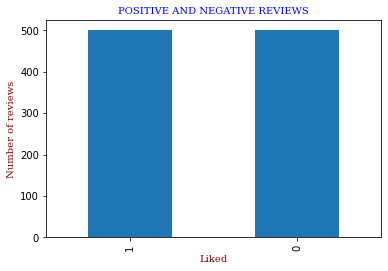

In [ ]:
res_data["Liked"].value_counts().plot(kind="bar")   #visuvalizing the data
plt.title("POSITIVE AND NEGATIVE REVIEWS",family="serif",color="blue",size=10)
plt.xlabel("Liked",family="serif",color="darkred",size=10)
plt.ylabel("Number of reviews",family="serif",color="darkred",size=10)
plt.show()

In [ ]:
x = res_data['Review'].values  #dividing the data into input and output
y = res_data['Liked'].values

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(750,)

In [ ]:
y_train.shape

(750,)

In [ ]:
x_test.shape

(250,)

In [ ]:
y_test.shape

(250,)

In [ ]:
# Applying the Count vectorizer to convert text to sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
x_train_vect.toarray() #coverting the sparse matrix to an array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.svm import SVC #importing the support vector machine library

In [ ]:
model1=SVC() #creating the ML model

In [ ]:
model1.fit(x_train_vect,y_train) #training the ML model

SVC()

In [ ]:
y_pred1 = model1.predict(x_test_vect) #predicting the values using SVM model
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
np.unique(y_pred1,return_counts=True) #returns the count of zeroes and ones

(array([0, 1]), array([163,  87]))

In [ ]:
from sklearn.metrics import accuracy_score  #accuracy score for model1
accuracy_score(y_pred1,y_test)

0.72

In [ ]:
# PIPELINE (combines two estimators = svc+countvectorizer)
from sklearn.pipeline import make_pipeline

model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score #accuracy score for model2
accuracy_score(y_pred2,y_test)

0.792

In [ ]:
#Applying the Naive-Bayes algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model3 = MultinomialNB()

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_vect) #predicting the values for model 3
y_pred3

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.744

In [ ]:
# PIPELINE WITH MultinomialNB
# PIPELINE (combines two estimators = MultinomialNB+countvectorizer)
from sklearn.pipeline import make_pipeline

model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train)

y_pred4 = model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.784

In [ ]:
# # ACCURACY SCORES FOR ALL 4 MODELS
# SVC                       - 0.720
# SVC pipeline              - 0.792
# MultinomialNB             - 0.744
# MultinomialNB pipeline    - 0.784

In [ ]:
import joblib #using joblib for the pipeline models
joblib.dump(model2,'restaurant reviews')

['restaurant reviews']

In [ ]:
text_model=joblib.load('restaurant reviews')   #reloading the created joblib model for predictions
text_model

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
#predicting the new review
p=text_model.predict(['i like the food,it  is very tasty'])

In [ ]:
#predicting whether the review is positive or negative
op=["NEGATIVE","POSITIVE"]
print(op[p[0]])

POSITIVE


In [ ]:
text_model.predict(["i liked the food, it is very tasty"])

array([1])

In [ ]:
#creating the streamlit webapp
%%writefile webapp.py
import streamlit as st
import pandas as pd
import numpy as np
from transformers import pipeline
import joblib
pipe_lr=joblib.load(open("restaurant reviews",'rb'))
@st.cache
def predict_emotions(docx):
    results=pipe_lr.predict([docx])
    return results[0]
st.title("Sentiment Analyzer App")
st.write('Welcome to sentiment analysis app!')
form=st.form(key='sentiment-form')
user_input=form.text_area("enter your review")
submit=form.form_submit_button('submit')
if submit:
    #Apply fxn Here
    prediction=predict_emotions(user_input)

    st.success("Original text")
    st.write(user_input)

    st.success("Prediction")
    st.write("{}".format(prediction))
if(prediction==1):
   st.success("POSITIVE")
else:
   st.success("NEGATIVE")

Overwriting webapp.py


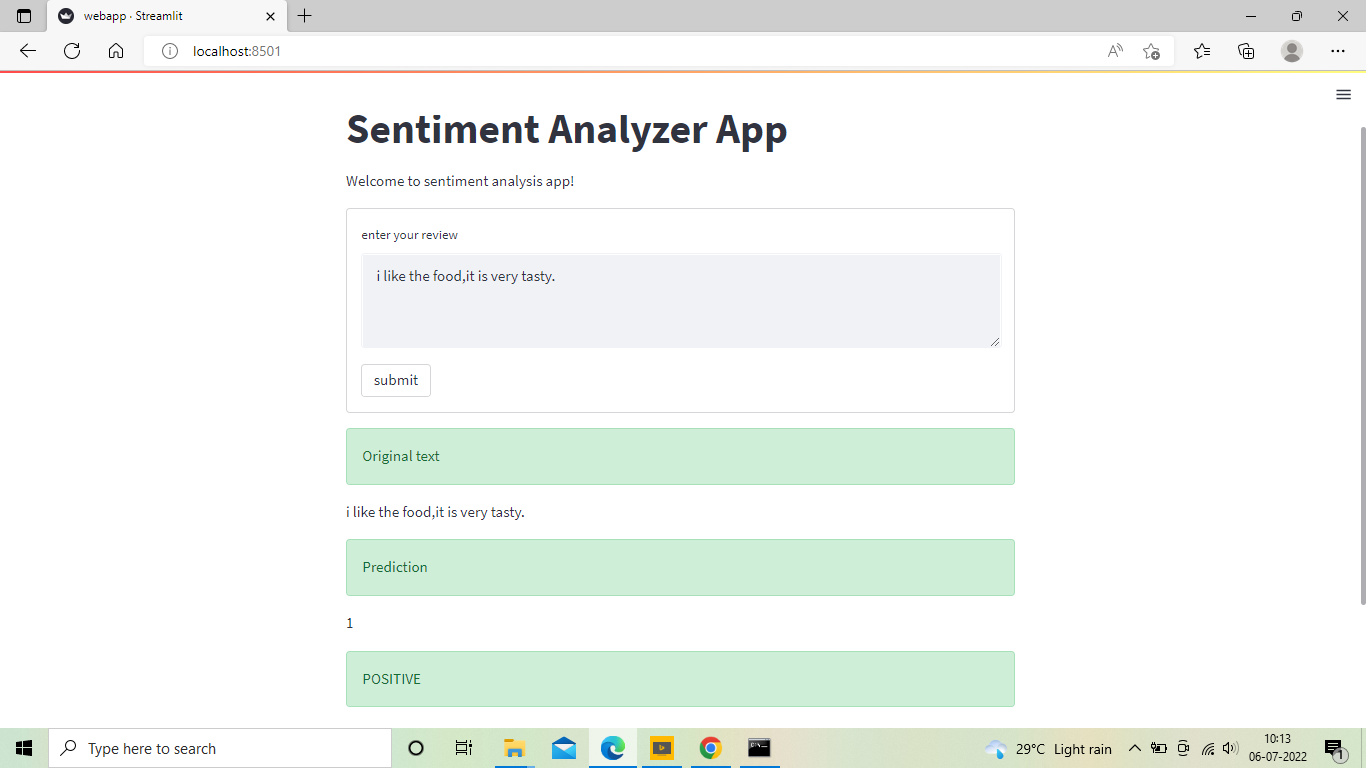

**SENTIMENT ANALYSIS**

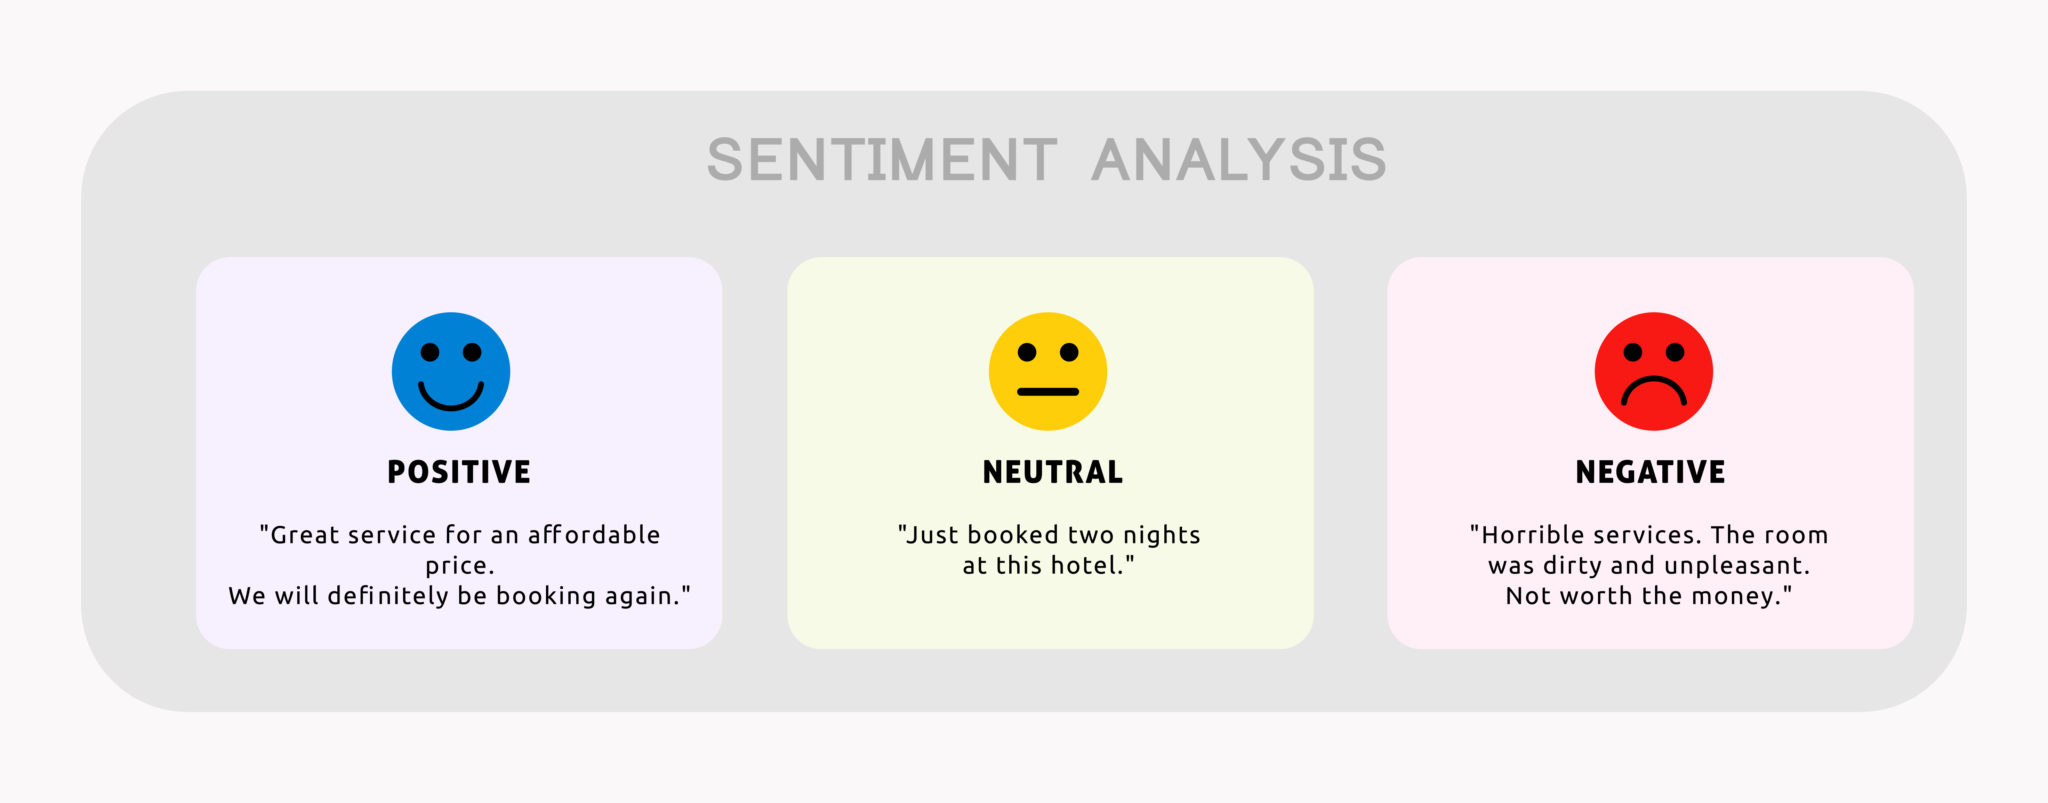

In [ ]:
#SENTIMENT ANALYSIS
# 1.Sentiment analysis is the process of classifying whether a block of text is positive, negative, or, neutral.
# 2.Sentiment analysis is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text.
# 3.Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material.
# 4.The goal which Sentiment analysis tries to gain is to analyze people’s opinion in a way that it can help the businesses expand.
# 5.It focuses not only on polarity (positive, negative & neutral) but also on emotions (happy, sad, angry, etc.).
# 6.For example, if we want to analyze whether a product is satisfying customer requirements, or is there a need for this product in the market? We can use sentiment analysis to monitor that product’s reviews.
# 7.Sentiment analysis is also efficient to use when there is a large set of unstructured data, and we want to classify that data by automatically tagging it
# It uses various Natural Language Processing algorithms such as Rule-based, Automatic, and Hybrid.
# 8.Sentiment Analysis has a wide range of applications as:
# ->Social Media: If for instance the comments on social media side as Instagram, over here all the reviews are analyzed and categorized as positive, negative, and neutral.
# ->Customer Service: In the play store, all the comments in the form of 1 to 5 are done with the help of sentiment analysis approaches.
# ->Marketing Sector: In the marketing area where a particular product needs to be reviewed as good or bad.
# ->Reviewer side: All the reviewers will have a look at the comments and will check and give the overall review of the product.
# 9.There are major challenges in sentiment analysis approach:
# ->If the data is in the form of a tone, then it becomes really difficult to detect whether the comment is pessimist or optimist.
# ->If the data is in the form of emoji, then you need to detect whether it is good or bad.
# ->Even the ironic, sarcastic, comparing comments detection is really hard.
#  Comparing a neutral statement is a big task.

**TWITTER REVIEWS**

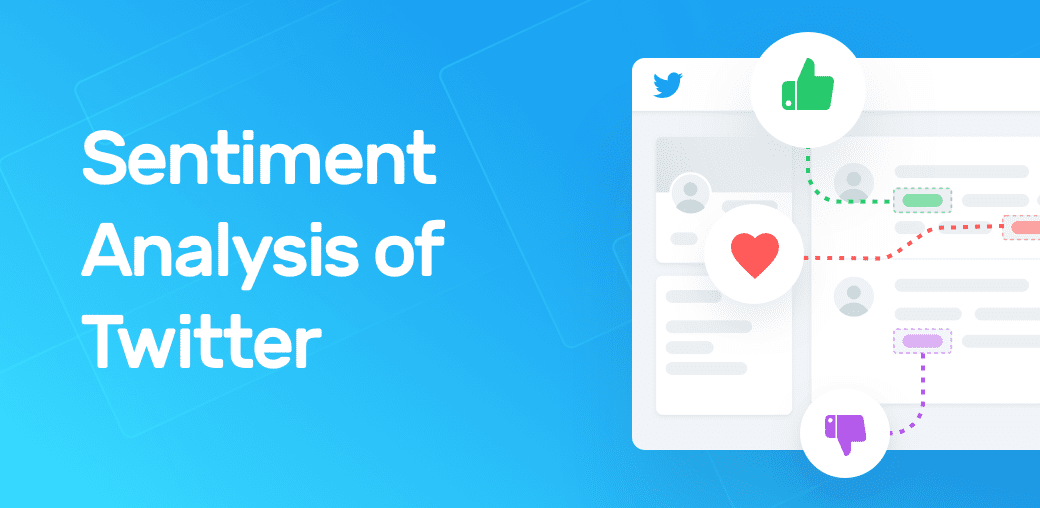

In [ ]:
##TWITTER SENTIMENTS
# 1.Twitter allows businesses to engage personally with consumers. However, there’s so much data on Twitter that it can be hard for brands to prioritize which tweets or mentions to respond to first.
# 2.Sentiment analysis is a tool that automatically monitors emotions in conversations on social media platforms.
# 3.Sentiment analysis helps you monitor your customers emotions on Twitter and understand how they feel.
# 4.Carefully listening to the voice of the customer on Twitter using sentiment analysis allows companies to understand their audience, keep on top of what’s being said about their brand – and their competitors – and discover new trends in the industry.
# 5.Sentiment analysis uses Natural Language Processing (NLP) to make sense of human language, and machine learning to automatically deliver accurate results.
# 6.Performing sentiment analysis on Twitter data involves five steps:
# ->Gather relevant Twitter data
# ->Clean your data using pre-processing techniques
# ->Create a sentiment analysis machine learning model
# ->Analyze your Twitter data using your sentiment analysis model
# ->Visualize the results of your Twitter sentiment analysis
# ->Counts the number of positive and negative words that appear in a given text. If the number of positive word appearances is greater than the number of negative word appearances, the system returns a positive sentiment, and vice versa. If the numbers are even, the system will return a neutral sentiment.
# ->Twitter sentiment analysis provides many exciting opportunities. Being able to analyze tweets in real-time, and determine the sentiment that underlies each message, adds a new dimension to social media monitoring.
# 7.Here are some of the most common business applications of Twitter sentiment analysis.
# ->Social Media Monitoring
# ->Customer Service
# ->Market Research
# ->Brand Monitoring
# ->Political Campaigns
# 10.The XGBoost and Naive Bayes algorithms were tied for the highest accuracy of the 12 twitter sentiment analysis approaches tested.